# data.csv

```
SELECT period.name, internship.type, skill_entry_with_workflow.id, skill_main.code, skill_descriptor.code, skill_situation_family.code ,skill_entry_with_workflow.workflow_state, skill_entry_with_workflow.created_at, skill_entry_with_workflow.updated_at
FROM skill_entry_with_workflow
LEFT JOIN skill_descriptor ON skill_entry_with_workflow.skill_descriptor_id = skill_descriptor.id
LEFT JOIN skill_main ON skill_descriptor.skill_main_id = skill_main.id
LEFT JOIN skill_container_with_situation_family ON skill_entry_with_workflow.skill_container_id = skill_container_with_situation_family.id
LEFT JOIN skill_situation_family ON skill_container_with_situation_family.situation_family_id = skill_situation_family.id
LEFT JOIN scoreboard_entry_abstract ON skill_container_with_situation_family.id = scoreboard_entry_abstract.skill_container_id
LEFT JOIN internship_assignment ON scoreboard_entry_abstract.internship_assignment_id = internship_assignment.id
LEFT JOIN period ON internship_assignment.period_id = period.id
LEFT JOIN internship ON internship_assignment.internship_id = internship.id

WHERE (period.name = "20222" OR period.name = "20231" OR period.name = "20232" OR period.name = "20241") AND internship.type = "internshipPractical"
```

In [29]:
import pandas as pd
import numpy as np
from fanalysis.ca import CA
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('data/data.csv')
display(data)

,name,type,id,code,code.1,code.2,workflow_state,created_at,updated_at
0,20232,internshipPractical,018fb9a9-679e-7a4a-b7aa-39c1aa113192,C1,C1NnD5,FS02,certified,2024-05-27 12:47:18,2024-07-01 11:38:05
1,20232,internshipPractical,018fb9a9-b74f-7747-b952-19298903556b,C3,C3NnD3,FS02,certified,2024-05-27 12:47:38,2024-07-01 11:38:30
2,20232,internshipPractical,018fb9ae-2e81-7832-b25a-224b59a31ad0,C1,C1NnD1,FS01,certified,2024-05-27 12:52:31,2024-07-01 11:38:47
3,20232,internshipPractical,018fb9ae-6869-76b8-a0cc-6b25e384dbf6,C1,C1NnD6,FS01,certified,2024-05-27 12:52:46,2024-07-01 11:38:59
4,20232,internshipPractical,018fc3ff-7f2e-7a8e-b760-aa27fd7cdb33,C1,C1NiD6,FS03,certified,2024-05-29 12:57:32,2024-07-01 11:39:37
...,...,...,...,...,...,...,...,...,...
81634,20231,internshipPractical,1ee7d757-ded1-66d2-81c2-c3fe946aa90b,C4,C4NcD3,FS02,in_progress,2023-11-07 14:56:47,2023-11-07 14:56:47
81635,20231,internshipPractical,1ee7d759-4478-6548-87da-032039870491,C5,C5NcD2,FS09,in_progress,2023-11-07 14:57:24,2023-11-07 14:57:24
81636,20231,internshipPractical,1ee7d75a-668d-6754-a53d-932a1d23546b,C5,C5NcD6,FS01,in_progress,2023-11-07 14:57:55,2023-11-07 14:57:55
81637,20231,internshipPractical,1ee7d75c-e927-6758-b419-bf1c633e8370,C3,C3NcD1,FS10,in_progress,2023-11-07 14:59:02,2023-11-07 14:59:02


In [31]:
# data_pt = pd.pivot_table(data, values="name", index=[data['id']], columns=data['record'], aggfunc="count", fill_value=0, dropna=False)


data_pt = pd.pivot_table(data, values="id", index=[data['code.1']], columns=data['code.2'], aggfunc="count")
display(data_pt)

code.2,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
code.1,,,,,,,,,,,
C1NcD1,120,136,97,100,52,44,66,31,62,27,28
C1NcD2,89,68,80,63,40,54,76,16,87,26,23
C1NcD3,109,72,56,48,48,87,112,20,54,25,12
C1NcD4,88,76,69,63,28,24,45,35,135,35,21
C1NcD5,65,62,63,63,28,14,21,15,41,15,9
...,...,...,...,...,...,...,...,...,...,...,...
C6NiD5,90,120,85,99,34,16,37,29,47,23,34
C6NnD1,115,89,69,109,53,12,24,23,33,24,12
C6NnD2,136,189,121,126,51,8,34,29,35,32,9


In [32]:
col_names = list(data_pt.columns)[0:]
row_names = list(data_pt.index)

In [33]:
X = data_pt[col_names].values 

In [34]:
row_sum = np.sum(X, axis=1)
row_profile = X / row_sum[:, np.newaxis]

print("Profil ligne:")
display(pd.DataFrame(row_profile, index=row_names, columns=col_names))

Profil ligne:


,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
C1NcD1,0.157274,0.178244,0.127130,0.131062,0.068152,0.057667,0.086501,0.040629,0.081258,0.035387,0.036697
C1NcD2,0.143087,0.109325,0.128617,0.101286,0.064309,0.086817,0.122186,0.025723,0.139871,0.041801,0.036977
C1NcD3,0.169518,0.111975,0.087092,0.074650,0.074650,0.135303,0.174184,0.031104,0.083981,0.038880,0.018663
C1NcD4,0.142165,0.122779,0.111470,0.101777,0.045234,0.038772,0.072698,0.056543,0.218094,0.056543,0.033926
C1NcD5,0.164141,0.156566,0.159091,0.159091,0.070707,0.035354,0.053030,0.037879,0.103535,0.037879,0.022727
...,...,...,...,...,...,...,...,...,...,...,...
C6NiD5,0.146580,0.195440,0.138436,0.161238,0.055375,0.026059,0.060261,0.047231,0.076547,0.037459,0.055375
C6NnD1,0.204263,0.158082,0.122558,0.193606,0.094139,0.021314,0.042629,0.040853,0.058615,0.042629,0.021314
C6NnD2,0.176623,0.245455,0.157143,0.163636,0.066234,0.010390,0.044156,0.037662,0.045455,0.041558,0.011688
C6NnD3,0.166003,0.197875,0.146082,0.108898,0.062417,0.033201,0.063745,0.067729,0.073041,0.061089,0.019920


In [35]:
col_sum = np.sum(X, axis=0)
col_profile = X / col_sum[np.newaxis, :]

print("Profil colonne:")
display(pd.DataFrame(col_profile, index=row_names, columns=col_names))

Profil colonne:


,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
C1NcD1,0.007998,0.008549,0.007877,0.009013,0.010417,0.016218,0.014451,0.012460,0.010026,0.007601,0.009926
C1NcD2,0.005932,0.004274,0.006496,0.005678,0.008013,0.019904,0.016641,0.006431,0.014069,0.007320,0.008153
C1NcD3,0.007265,0.004526,0.004547,0.004326,0.009615,0.032068,0.024524,0.008039,0.008732,0.007038,0.004254
C1NcD4,0.005865,0.004777,0.005603,0.005678,0.005609,0.008846,0.009853,0.014068,0.021831,0.009854,0.007444
C1NcD5,0.004332,0.003897,0.005116,0.005678,0.005609,0.005160,0.004598,0.006029,0.006630,0.004223,0.003190
...,...,...,...,...,...,...,...,...,...,...,...
C6NiD5,0.005999,0.007543,0.006902,0.008923,0.006811,0.005898,0.008102,0.011656,0.007600,0.006475,0.012052
C6NnD1,0.007665,0.005594,0.005603,0.009824,0.010617,0.004423,0.005255,0.009244,0.005336,0.006757,0.004254
C6NnD2,0.009065,0.011880,0.009825,0.011356,0.010216,0.002949,0.007445,0.011656,0.005660,0.009009,0.003190
C6NnD3,0.008332,0.009366,0.008932,0.007391,0.009415,0.009215,0.010510,0.020498,0.008894,0.012950,0.005317


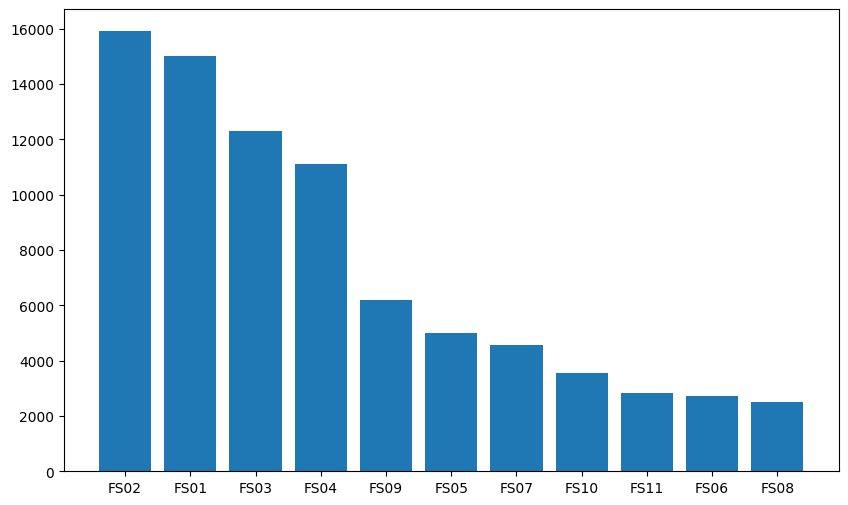

In [36]:
total_FS = data_pt[col_names].sum()

prop_FS = total_FS
prop_FS = prop_FS.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_FS.index, prop_FS)

plt.show()

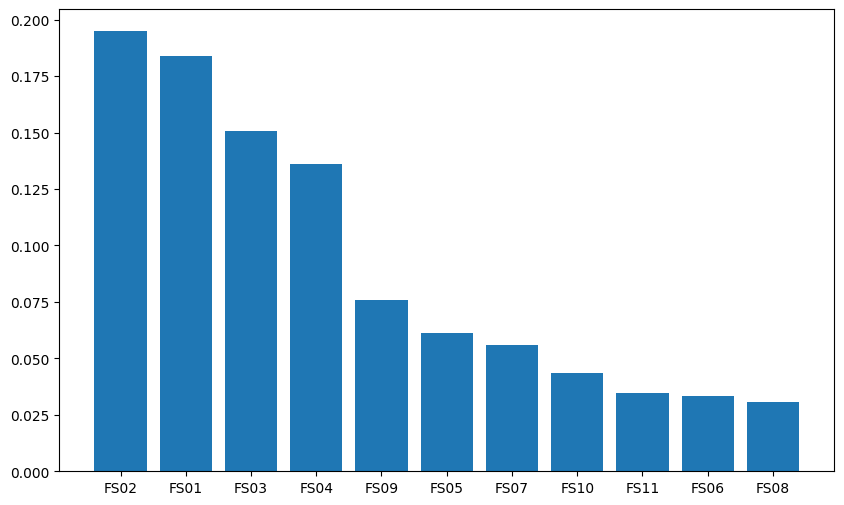

In [37]:
total_skill = data_pt[col_names].sum()

prop_FS = total_FS / total_FS.sum()
prop_FS = prop_FS.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_FS.index, prop_FS)

plt.show()

In [38]:
data_pt

code.2,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
code.1,,,,,,,,,,,
C1NcD1,120,136,97,100,52,44,66,31,62,27,28
C1NcD2,89,68,80,63,40,54,76,16,87,26,23
C1NcD3,109,72,56,48,48,87,112,20,54,25,12
C1NcD4,88,76,69,63,28,24,45,35,135,35,21
C1NcD5,65,62,63,63,28,14,21,15,41,15,9
...,...,...,...,...,...,...,...,...,...,...,...
C6NiD5,90,120,85,99,34,16,37,29,47,23,34
C6NnD1,115,89,69,109,53,12,24,23,33,24,12
C6NnD2,136,189,121,126,51,8,34,29,35,32,9


In [39]:
my_ca = CA(row_labels=data_pt.index.values, col_labels=data_pt.columns.values,stats=True)

In [40]:
my_ca.fit(data_pt.values)


CA(col_labels=array(['FS01', 'FS02', 'FS03', 'FS04', 'FS05', 'FS06', 'FS07', 'FS08',
       'FS09', 'FS10', 'FS11'], dtype=object),
   row_labels=array(['C1NcD1', 'C1NcD2', 'C1NcD3', 'C1NcD4', 'C1NcD5', 'C1NcD6',
       'C1NcD7', 'C1NiD1', 'C1NiD2', 'C1NiD3', 'C1NiD4', 'C1NiD5',
       'C1NiD6', 'C1NiD7', 'C1NnD1', 'C1NnD2', 'C1NnD3', 'C1NnD4',
       'C1NnD5', 'C1NnD6', 'C1NnD7', 'C1NnD8', 'C1NnD9', 'C2NID1',
       'C2...
       'C4NnD1', 'C4NnD2', 'C4NnD3', 'C5NcD1', 'C5NcD2', 'C5NcD3',
       'C5NcD4', 'C5NcD5', 'C5NcD6', 'C5NcD7', 'C5NcD8', 'C5NiD1',
       'C5NiD2', 'C5NiD3', 'C5NiD4', 'C5NiD5', 'C5NiD6', 'C5NnD1',
       'C5NnD2', 'C5NnD3', 'C5NnD4', 'C5NnD5', 'C5NnD6', 'C5NnD7',
       'C6NcD1', 'C6NcD2', 'C6NcD3', 'C6NcD4', 'C6NcD5', 'C6NcD6',
       'C6NiD1', 'C6NiD2', 'C6NiD3', 'C6NiD4', 'C6NiD5', 'C6NnD1',
       'C6NnD2', 'C6NnD3', 'C6NnD4'], dtype=object))

In [41]:
my_ca.eig_

array([[4.92074384e-02, 2.44953461e-02, 1.49552059e-02, 9.34421340e-03,
        5.22933899e-03, 4.82568674e-03, 3.28810131e-03, 2.21750108e-03,
        1.54564224e-03, 1.26392078e-03],
       [4.22844597e+01, 2.10491037e+01, 1.28511627e+01, 8.02957901e+00,
        4.49362496e+00, 4.14676242e+00, 2.82549939e+00, 1.90552157e+00,
        1.32818633e+00, 1.08610017e+00],
       [4.22844597e+01, 6.33335634e+01, 7.61847261e+01, 8.42143052e+01,
        8.87079301e+01, 9.28546925e+01, 9.56801919e+01, 9.75857135e+01,
        9.89138998e+01, 1.00000000e+02]])

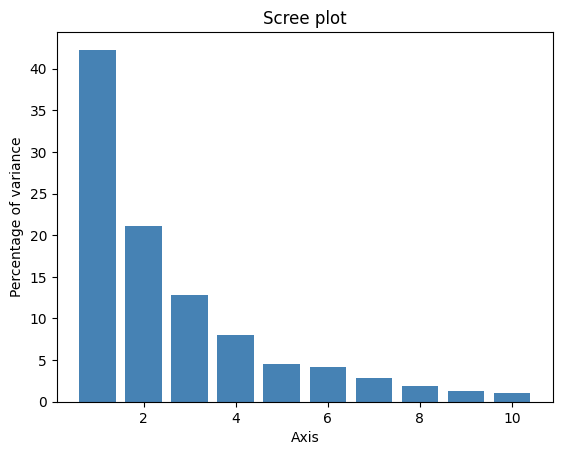

In [42]:
# Graphique des valeurs propres
my_ca.plot_eigenvalues(type="percentage")

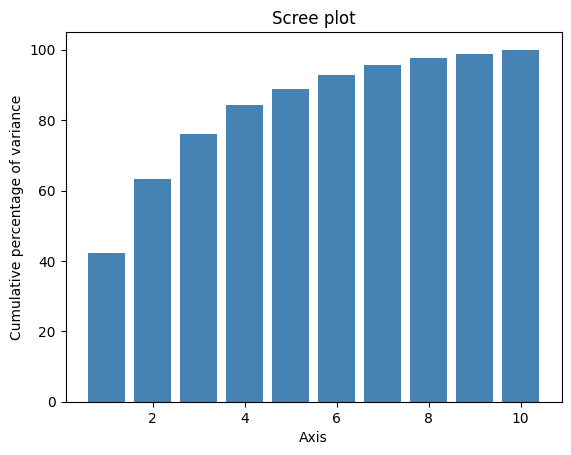

In [43]:
my_ca.plot_eigenvalues(type="cumulative")


Premier axe factoriel


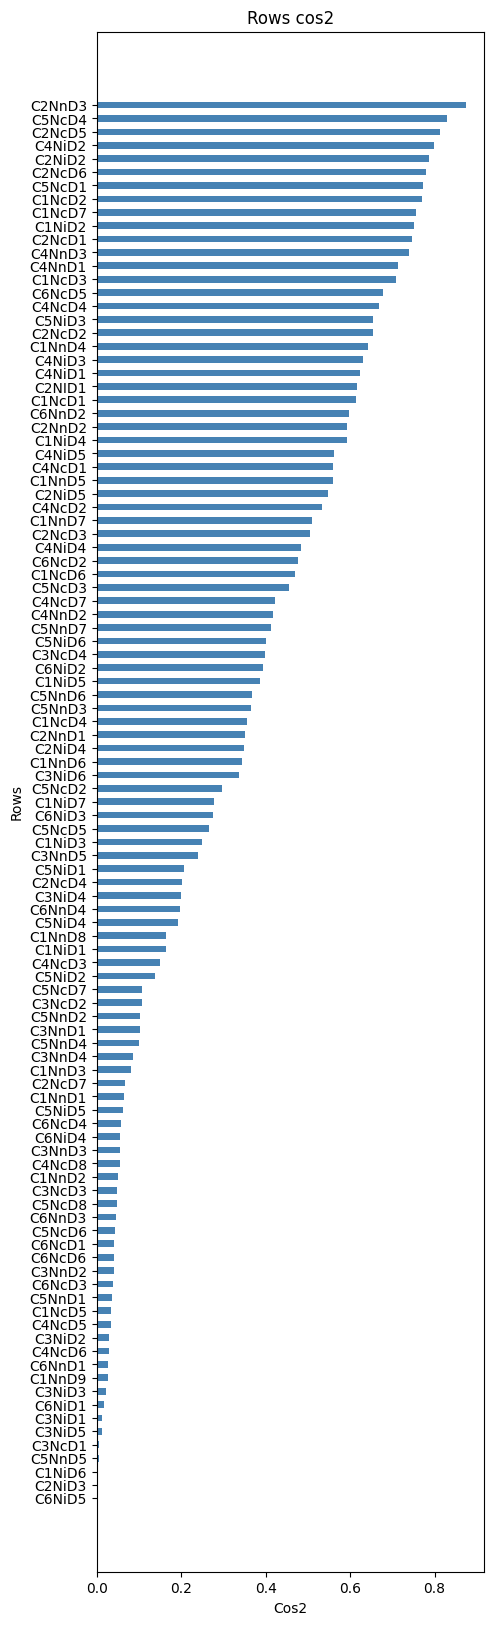

Second axe factoriel


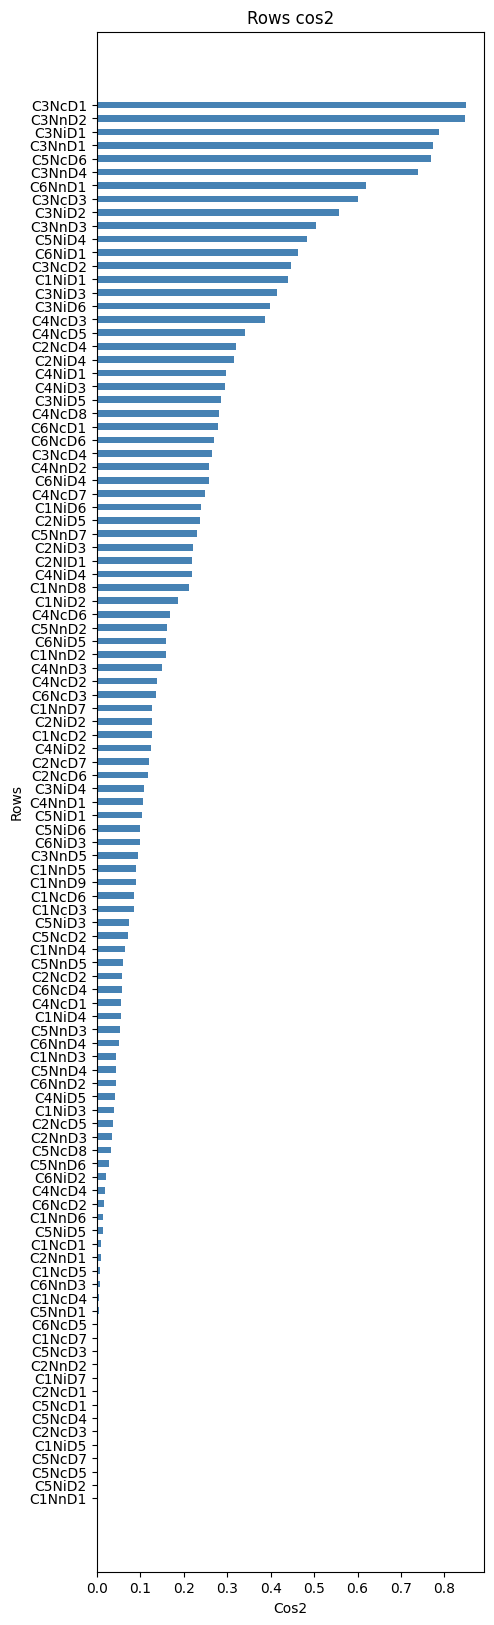

In [44]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
print("Premier axe factoriel")
my_ca.plot_row_cos2(num_axis=1, figsize=[5,20])
print("Second axe factoriel")
my_ca.plot_row_cos2(num_axis=2, figsize=[5,20])

Premier axe factoriel


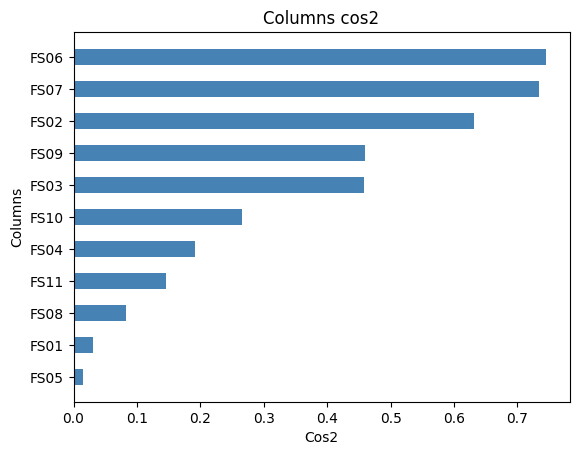

Second axe factoriel


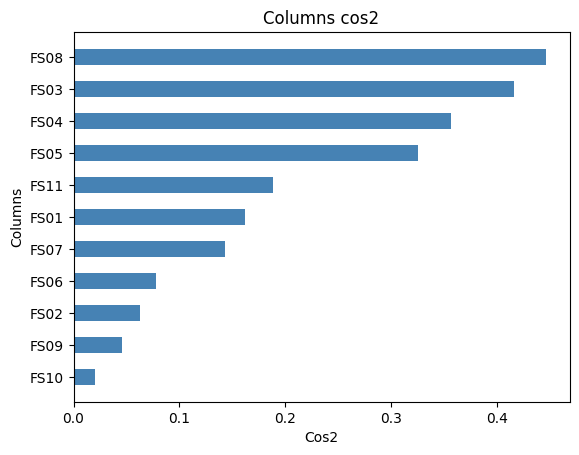

In [45]:
#### Profil colonne (les Candidats)

print("Premier axe factoriel")
my_ca.plot_col_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_col_cos2(num_axis=2)

Premier axe


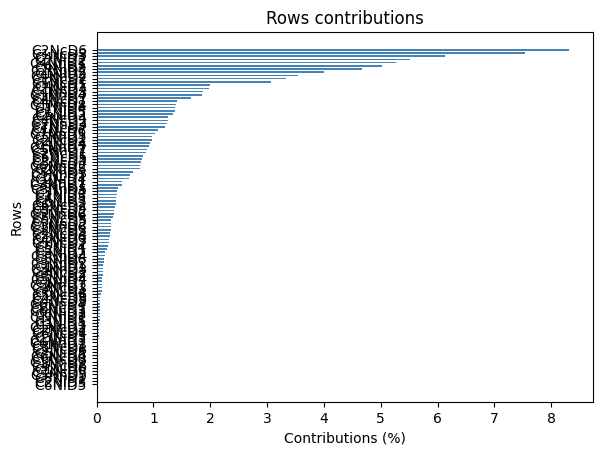

Second axe


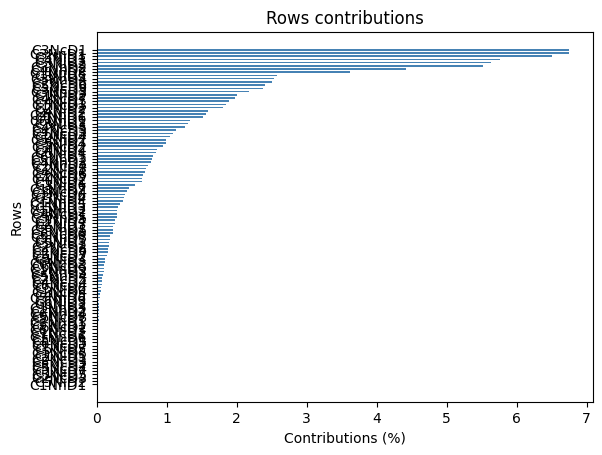

In [46]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_row_contrib(num_axis=1)
print("Second axe")
my_ca.plot_row_contrib(num_axis=2)

Premier axe


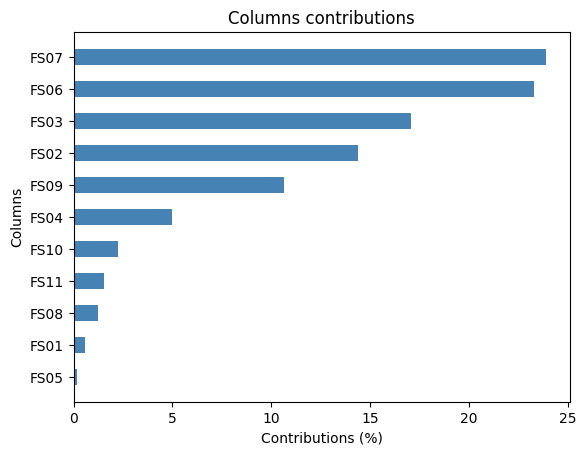

Second axe


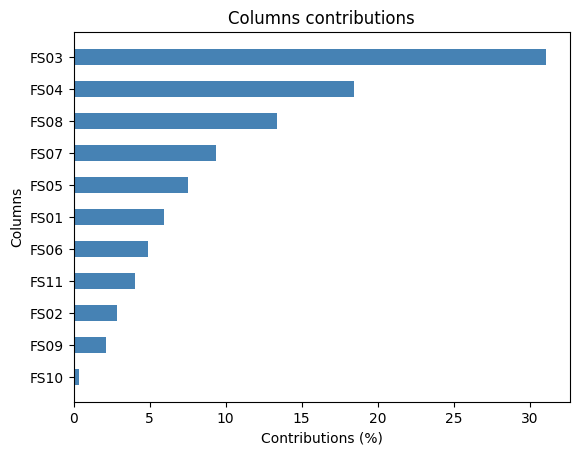

In [47]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_col_contrib(num_axis=1)
print("Second axe")
my_ca.plot_col_contrib(num_axis=2)

In [48]:
info_skill=my_ca.row_topandas()
info_skill

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_coord_dim6,row_coord_dim7,row_coord_dim8,row_coord_dim9,row_coord_dim10,...,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3,row_cos2_dim4,row_cos2_dim5,row_cos2_dim6,row_cos2_dim7,row_cos2_dim8,row_cos2_dim9,row_cos2_dim10
C1NcD1,0.175388,0.023281,0.051000,0.105179,-0.037683,-0.018290,0.045037,-0.004002,-0.014449,0.032607,...,0.614759,0.010832,0.051981,0.221086,0.028379,6.685475e-03,0.040536,0.000320,0.004172,0.021249
C1NcD2,0.463453,0.187598,0.135597,0.033045,0.000702,-0.081525,-0.006031,-0.051429,0.011288,0.003591,...,0.770049,0.126172,0.065919,0.003915,0.000002,2.382786e-02,0.000130,0.009482,0.000457,0.000046
C1NcD3,0.686502,0.239294,-0.008353,0.364507,-0.015304,-0.000256,-0.028782,-0.019015,0.051674,0.021848,...,0.707579,0.085971,0.000105,0.199481,0.000352,9.873653e-08,0.001244,0.000543,0.004009,0.000717
C1NcD4,0.357841,0.043185,0.138089,-0.348563,-0.071059,-0.111282,0.184259,-0.186005,0.046730,0.009225,...,0.356954,0.005199,0.053156,0.338683,0.014076,3.452070e-02,0.094643,0.096445,0.006087,0.000237
C1NcD5,0.033528,-0.016851,0.097237,-0.021741,-0.039078,-0.061731,-0.003819,-0.113724,0.052754,-0.013374,...,0.034501,0.008715,0.290180,0.014506,0.046868,1.169552e-01,0.000448,0.396927,0.085411,0.005489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C6NiD5,0.001099,-0.078218,0.112267,-0.003744,-0.032333,0.027427,0.079278,0.018284,-0.093945,0.048231,...,0.000032,0.159714,0.329032,0.000366,0.027291,1.963756e-02,0.164073,0.008727,0.230400,0.060727
C6NnD1,-0.046238,-0.218063,0.017790,0.073901,-0.027592,-0.037620,-0.059880,-0.091518,0.038244,-0.075557,...,0.027846,0.619350,0.004122,0.071133,0.009916,1.843396e-02,0.046702,0.109090,0.019050,0.074358
C6NnD2,-0.200192,-0.054089,-0.058279,0.079200,-0.032248,0.021568,0.072289,-0.061291,0.005750,-0.061439,...,0.598458,0.043688,0.050719,0.093668,0.015529,6.946567e-03,0.078033,0.056096,0.000494,0.056368
C6NnD3,0.055308,-0.024061,-0.039065,0.002695,-0.186069,0.102043,0.110321,-0.045159,0.051238,-0.017096,...,0.045430,0.008598,0.022664,0.000108,0.514183,1.546451e-01,0.180752,0.030287,0.038991,0.004341


In [49]:
info_FS=my_ca.col_topandas()
info_FS

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_coord_dim6,col_coord_dim7,col_coord_dim8,col_coord_dim9,col_coord_dim10,...,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4,col_cos2_dim5,col_cos2_dim6,col_cos2_dim7,col_cos2_dim8,col_cos2_dim9,col_cos2_dim10
FS01,0.039142,-0.088995,-0.180969,-0.031311,0.033223,0.011838,-0.062088,-0.018255,0.000881,0.017013,...,0.031328,0.161951,0.669666,2.004668e-02,0.022570,0.002866,0.078824,0.006814,0.000016,0.005918
FS02,-0.190620,0.060240,-0.090570,0.032619,0.021856,-0.015619,0.080890,0.030887,-0.001613,0.004894,...,0.632182,0.063136,0.142715,1.851187e-02,0.008311,0.004244,0.113840,0.016598,0.000045,0.000417
FS03,-0.235889,0.224589,0.083809,-0.022294,-0.060173,0.023598,-0.057933,-0.010676,0.002974,0.006237,...,0.458725,0.415829,0.057906,4.097516e-03,0.029849,0.004591,0.027669,0.000940,0.000073,0.000321
FS04,-0.133940,-0.182354,0.169150,0.069560,0.080878,0.012050,0.002118,-0.043232,-0.000923,-0.010016,...,0.192273,0.356393,0.306650,5.185780e-02,0.070107,0.001556,0.000048,0.020031,0.000009,0.001075
FS05,0.037250,-0.173404,-0.003202,0.092648,-0.124784,-0.170298,-0.048851,0.045169,0.016309,-0.054773,...,0.015031,0.325721,0.000111,9.298173e-02,0.168672,0.314154,0.025850,0.022101,0.002881,0.032498
FS06,0.587374,0.189790,0.107124,0.211848,0.057821,0.013658,-0.015987,0.055637,0.119423,0.068024,...,0.744912,0.077772,0.024777,9.689991e-02,0.007218,0.000403,0.000552,0.006683,0.030793,0.009991
FS07,0.458348,0.202224,-0.031473,0.139923,-0.013211,0.033730,0.015768,-0.041419,-0.099804,-0.039151,...,0.733744,0.142830,0.003460,6.838028e-02,0.000610,0.003974,0.000868,0.005992,0.034789,0.005354
FS08,0.141703,-0.327793,0.020432,-0.000132,-0.278455,0.123231,0.107356,-0.061368,0.010278,0.068795,...,0.083388,0.446217,0.001734,7.271198e-08,0.322001,0.063065,0.047863,0.015640,0.000439,0.019655
FS09,0.262640,0.083167,0.080175,-0.221433,0.023804,-0.111691,0.053491,-0.050244,0.014372,0.002410,...,0.459875,0.046113,0.042855,3.268907e-01,0.003778,0.083168,0.019076,0.016830,0.001377,0.000039
FS10,0.159465,-0.044557,-0.002500,-0.134532,0.000792,0.178354,0.016530,0.059158,0.056584,-0.107388,...,0.265337,0.020715,0.000065,1.888512e-01,0.000007,0.331918,0.002851,0.036516,0.033408,0.120331


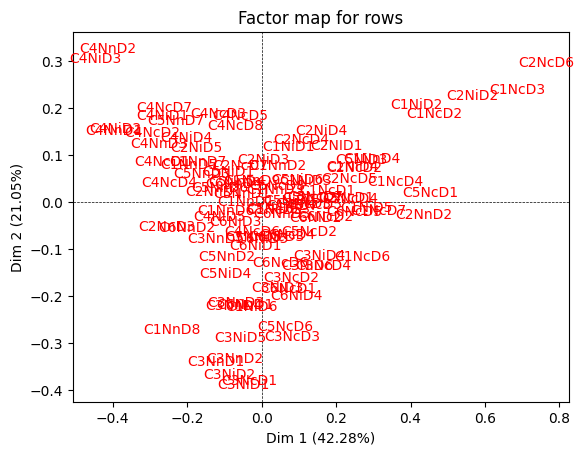

In [50]:
# Graphique des compétences (en ligne)
my_ca.mapping_row(num_x_axis=1,num_y_axis=2)

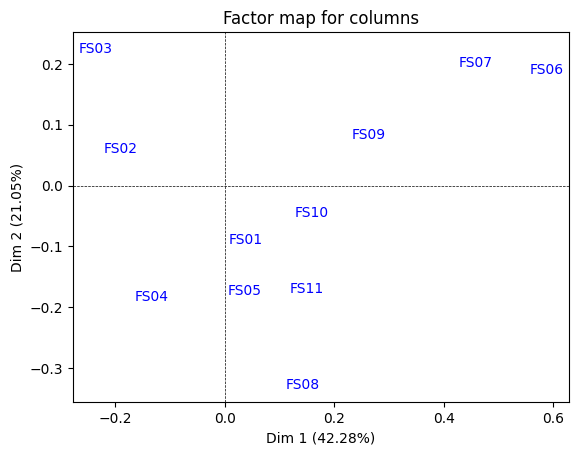

In [51]:
# Graphique des familles de situation (en colonne)
my_ca.mapping_col(num_x_axis=1,num_y_axis=2)

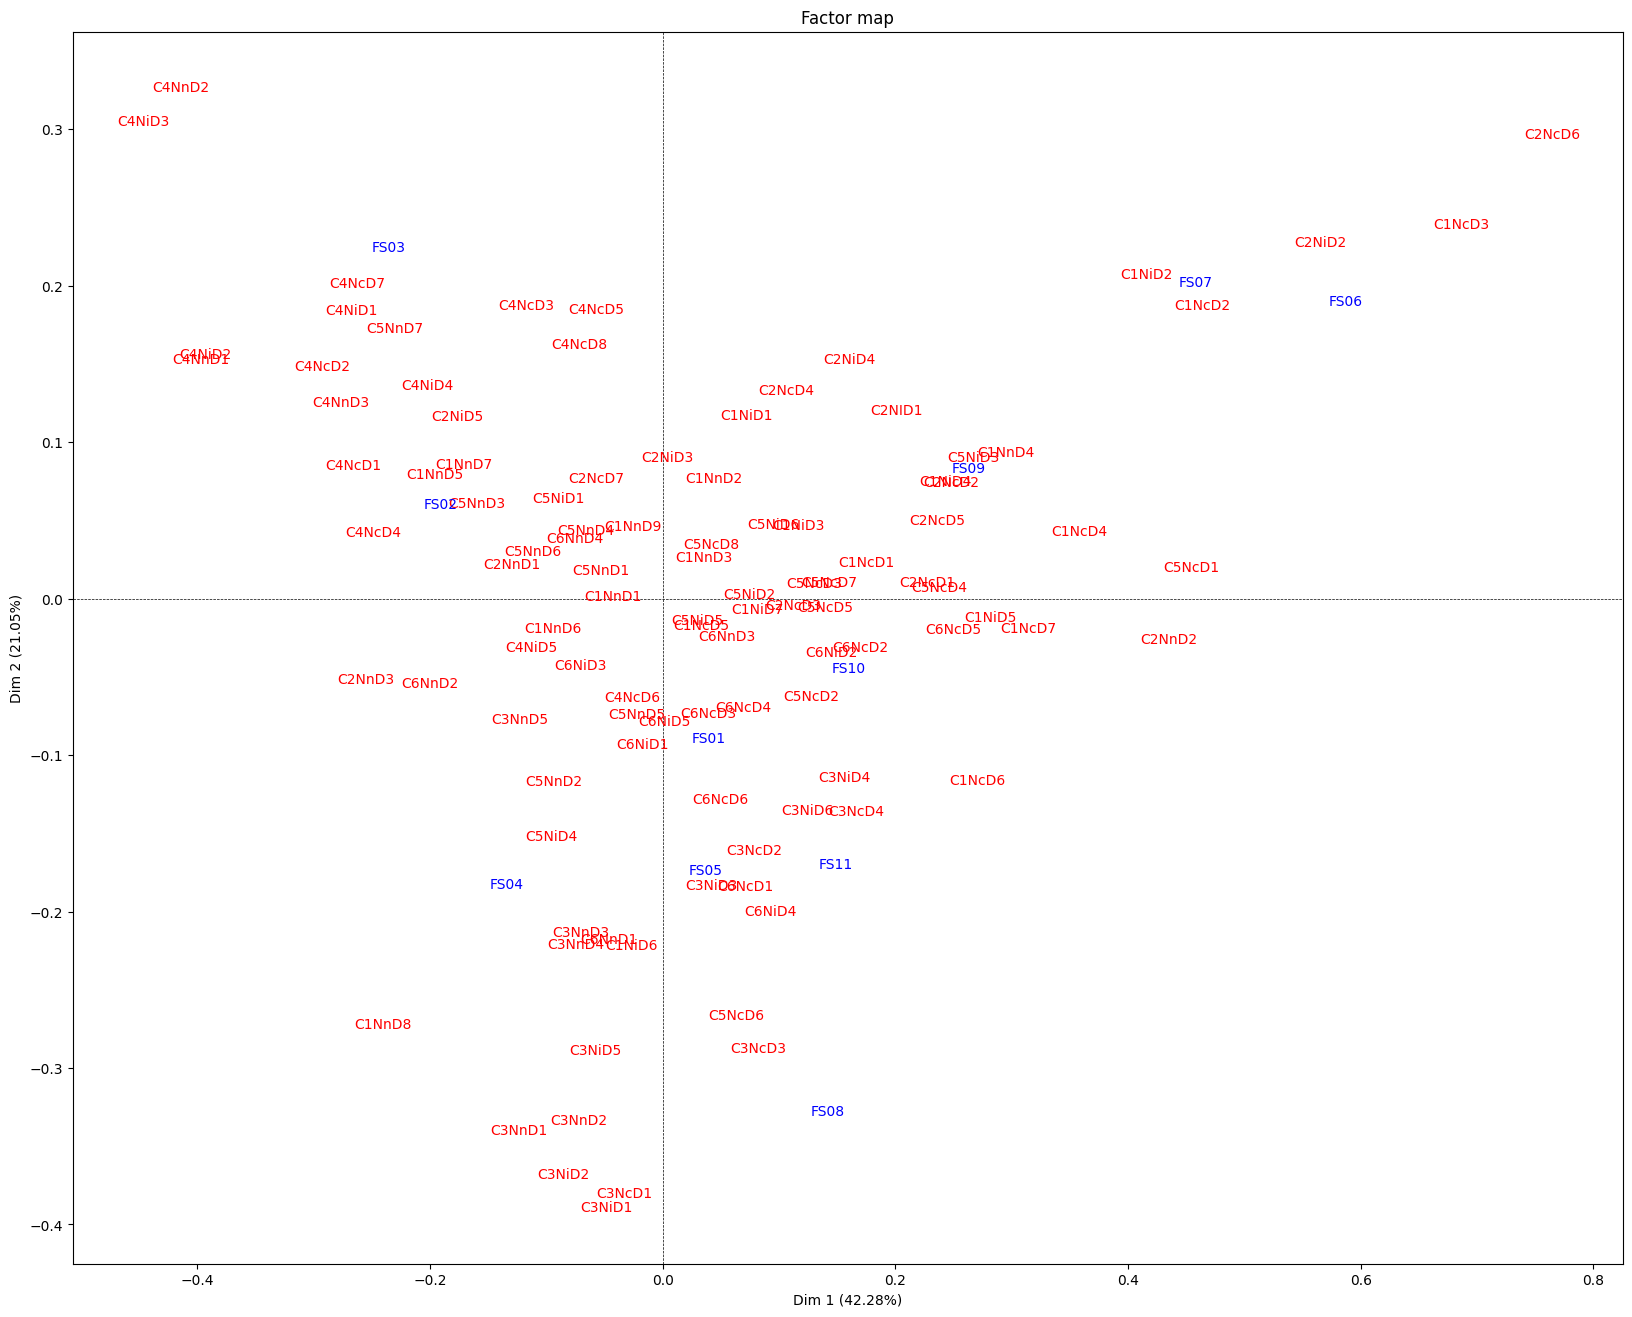

In [54]:
# Graphique profil ligne profil colonne

my_ca.mapping(1, 2, figsize=(20, 16))